## **Data Mining Project**  
>Александар Китановски (186008)  
>Виктор Јовев (186068)

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

1. Description of the data (with the calculation of basic statistics);
2. Research of dependencies and formulation of hypotheses;
3. Building models for predicting the outflow (with justification for the choice of a particular model) based on tested hypotheses and identified relationships;
4. Comparison of the quality of the obtained models.

1. customerID - customer id
2. gender - client gender (male / female)
3. SeniorCitizen - is the client retired (1, 0)
4. Partner - is the client married (Yes, No)
5. tenure - how many months a person has been a client of the company
6. PhoneService - is the telephone service connected (Yes, No)
7. MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
8. InternetService - client's Internet service provider (DSL, Fiber optic, No)
9. OnlineSecurity - is the online security service connected (Yes, No, No internet service)
10. OnlineBackup - is the online backup service activated (Yes, No, No internet service)
11. DeviceProtection - does the client have equipment insurance (Yes, No, No 12. internet service)
13. TechSupport - is the technical support service connected (Yes, No, No internet service)
14. StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
15. StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
16. Contract - type of customer contract (Month-to-month, One year, Two year)
17. PaperlessBilling - whether the client uses paperless billing (Yes, No)
18. PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges - current monthly payment
20. TotalCharges - the total amount that the client paid for the services for the entire time
21. Churn - whether there was a churn (Yes or No)

# **Libraries**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# **Loading Dataset**

In [ ]:
real_dataset= pd.read_csv("/content/dataset.csv")

In [ ]:
real_dataset.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


# **Exploratory Data Analysis**

In [ ]:
dataset = real_dataset.drop(columns=['customerID','Unnamed: 0']) 

In [ ]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [ ]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
print("Total Number:")
print(dataset['gender'].value_counts(),"\n")

Total Number:
Male      3050
Female    2936
Name: gender, dtype: int64 



In [ ]:
partners = {'Male':0, 'Female':0}
for row in range(len(dataset)):
  if dataset.iloc[row]['Partner'] == 'Yes':
       partners[dataset.iloc[row]['gender']]+=1

print("Married customers:")
print(partners,"\n")
#How many males and females are already married?

Married customers:
{'Male': 1468, 'Female': 1436} 



In [ ]:
retired_citizens = {'Male':0, 'Female':0}
for row in range(len(dataset)):
  if dataset.iloc[row]['SeniorCitizen'] == 1:
       retired_citizens[dataset.iloc[row]['gender']]+=1

print("Retired citizens:")
print(retired_citizens,"\n")
#How many males and females are already retired?

Retired citizens:
{'Male': 484, 'Female': 482} 



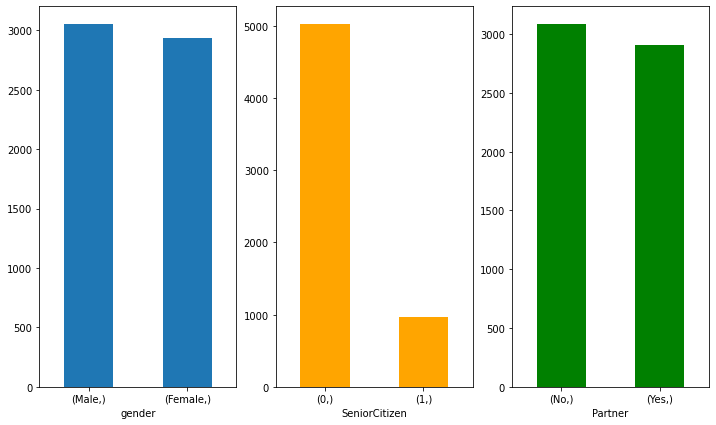

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12,7))
dataset[["gender"]].value_counts().plot(ax=axes[0], kind='bar',rot=0)
dataset[["SeniorCitizen"]].value_counts().plot(ax=axes[1], kind='bar',rot=0, color='orange') #0 - Not Retired , 1- Retired
dataset[["Partner"]].value_counts().plot(ax=axes[2], kind='bar',rot=0, color= 'green')
plt.show()
#basic visualizations

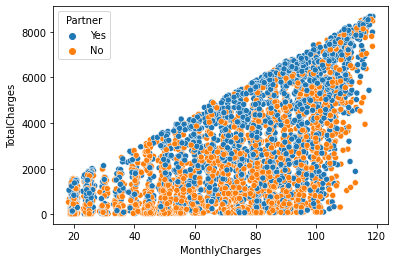

In [ ]:
cont_values = dataset[['TotalCharges','MonthlyCharges','tenure','SeniorCitizen']]
sns.scatterplot(x=cont_values['MonthlyCharges'],y=cont_values['TotalCharges'], hue='Partner', data = dataset)
# monthlyCharges < TotalCharges, cause a monthly charge is part of the total charges
plt.show()

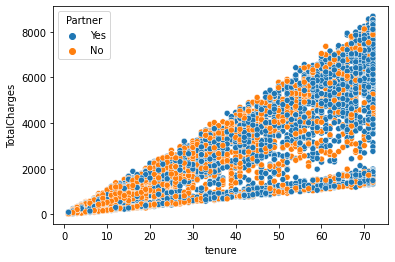

In [ ]:
sns.scatterplot(x=cont_values['tenure'],y=cont_values['TotalCharges'], hue= "Partner", data=dataset) 
#There is some pattern, tenure is proportional with TotalCharges. 
#However, we see that small gape between tenure's values [45,60+]
plt.show()


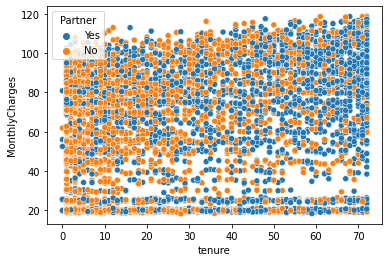

In [ ]:
sns.scatterplot(x = "tenure", y = "MonthlyCharges", hue = "Partner", data = dataset)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


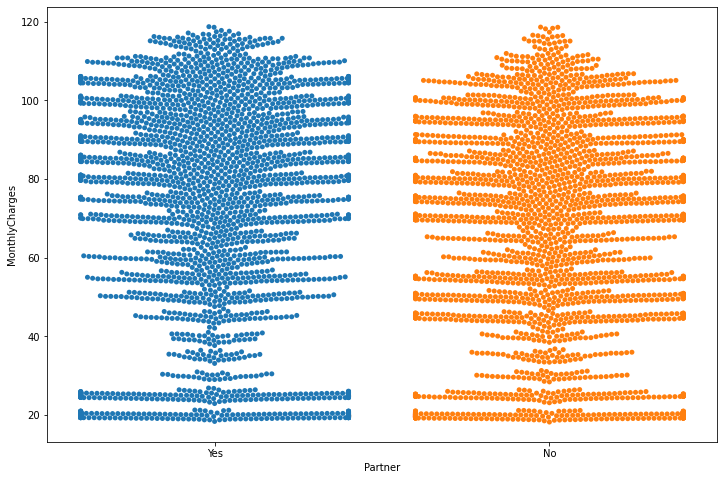

In [ ]:
plt.figure(figsize = (12, 8))
sns.swarmplot(x = "Partner", y = "MonthlyCharges", data = dataset)
plt.show()

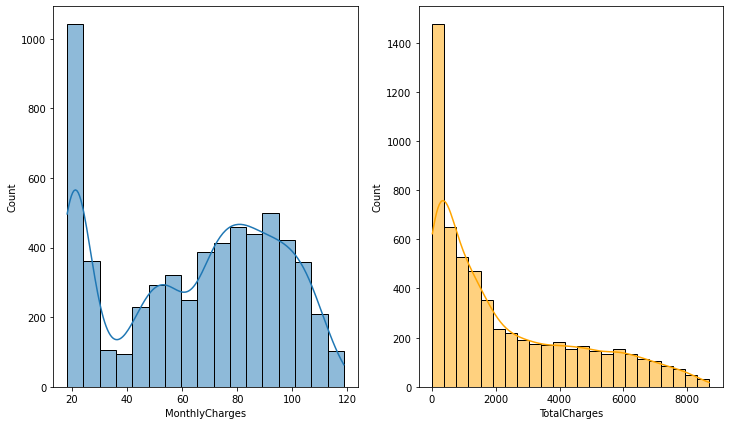

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(data=dataset, x="MonthlyCharges", kde=True, ax=axs[0])
sns.histplot(data=dataset, x="TotalCharges", kde=True, color="orange", ax=axs[1])
plt.show()

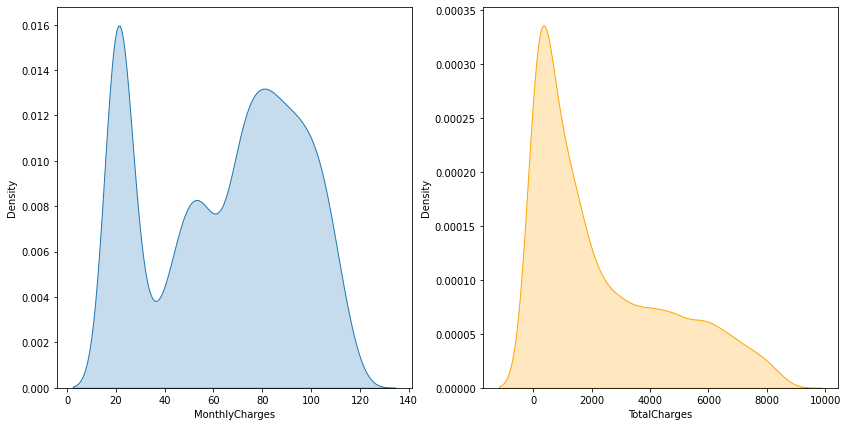

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
sns.kdeplot(data = dataset["MonthlyCharges"],shade=True, ax=axs[0])
sns.kdeplot(data = dataset["TotalCharges"],shade=True, ax=axs[1], color = 'orange')
plt.show()